In [ ]:
# This notebook includes VGG16 to classify if a food image is vegetarian or not vegetarian 

In [15]:
# Imports
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import adam_v2
import urllib.request
import ssl
import matplotlib.pyplot as plt


In [4]:
# Set the path to the dataset 
train_dir = '/Volumes/SSD/dishes'
valid_dir = '/Volumes/SSD/dishes-val'
test_dir = '/Volumes/SSD/dishes-test'

In [5]:
# Define the input image size
img_width, img_height = 224, 224

# Set the number of epochs and batch size
epochs = 20
batch_size = 32

# Create a data generator for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create a data generator for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Set the number of training and validation samples
nb_train_samples = 1985
nb_valid_samples = 833

In [7]:
# Download the VGG16 weights manually
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
if not os.path.exists(weights_path):
    url = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
    urllib.request.urlretrieve(url, weights_path)

In [8]:
# Build the VGG16 network
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

2023-04-15 11:10:24.663863: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Add a custom top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Freeze the VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Compile the model
model.compile(optimizer=adam_v2.Adam(learning_rate=0.0001, decay=0.0001/epochs), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Create the data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 1985 images belonging to 2 classes.
Found 833 images belonging to 2 classes.


In [24]:
# Train the model
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=nb_train_samples//batch_size, validation_data=valid_generator, validation_steps=nb_valid_samples//batch_size)

Epoch 1/20
62/62 [==============================] - 651s 11s/step - loss: 0.2723 - accuracy: 0.9427 - val_loss: 0.6713 - val_accuracy: 0.6370
Epoch 2/20
62/62 [==============================] - 641s 10s/step - loss: 0.2630 - accuracy: 0.9467 - val_loss: 0.6744 - val_accuracy: 0.6334
Epoch 3/20
62/62 [==============================] - 643s 10s/step - loss: 0.2624 - accuracy: 0.9406 - val_loss: 0.6698 - val_accuracy: 0.6358
Epoch 4/20
62/62 [==============================] - 643s 10s/step - loss: 0.2522 - accuracy: 0.9519 - val_loss: 0.6739 - val_accuracy: 0.6454
Epoch 5/20
62/62 [==============================] - 646s 10s/step - loss: 0.2448 - accuracy: 0.9529 - val_loss: 0.6826 - val_accuracy: 0.6370
Epoch 6/20
62/62 [==============================] - 643s 10s/step - loss: 0.2327 - accuracy: 0.9606 - val_loss: 0.6802 - val_accuracy: 0.6394
Epoch 7/20
62/62 [==============================] - 643s 10s/step - loss: 0.2314 - accuracy: 0.9585 - val_loss: 0.7038 - val_accuracy: 0.6334
Epoch 

In [25]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Found 2321 images belonging to 2 classes.
73/73 [==============================] - 832s 11s/step - loss: 0.6499 - accuracy: 0.6743
Test accuracy: 0.6742783188819885


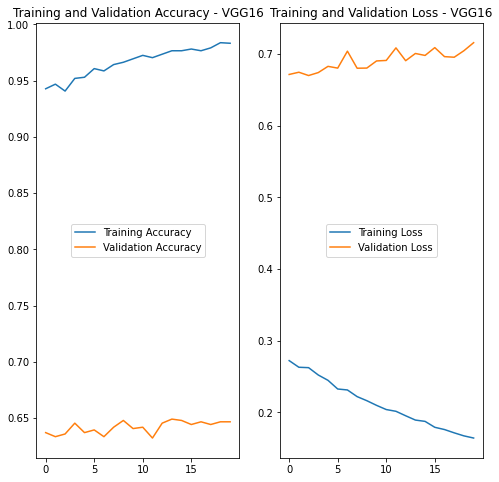

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='center')
plt.title('Training and Validation Accuracy - VGG16')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center')
plt.title('Training and Validation Loss - VGG16')
plt.show()